In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from seaborn import set_style
import statsmodels.tsa.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
set_style("whitegrid")

In [72]:
stock_symbols = ['GOOG','MSFT','AMZN','NVDA','AAPL']

In [124]:
df = [pd.read_csv(f'/home/hirak/Desktop/Erdos/SIGNS_2024/stock_data/{symbol}/stock_price.csv') for symbol in stock_symbols]
df_ss = [pd.read_csv(f'/home/hirak/Desktop/Erdos/SIGNS_2024/stock_news_sentiment_scores/2011-2024/stock_news_sentiment_analysis_results_{symbol}.csv') for symbol in stock_symbols]
df_gss = [pd.read_csv(f'/home/hirak/Desktop/Erdos/SIGNS_2024/news_sentiment_scores/2000-2024/sentiment_analysis_results_{symbol}.csv') for symbol in stock_symbols]

In [125]:
len(df), len(df_ss), len(df_gss)

(5, 5, 5)

In [126]:
for i in range(len(df)):
    df[i]['Date'] = pd.to_datetime(df[i]['Date'], utc=True).dt.date
    # df[i]['Date'].index = pd.DatetimeIndex(df[i]['Date'].index).to_period('M')
    df_ss[i]['Date'] = pd.to_datetime(df_ss[i]['Date'], utc=True).dt.date
    # df_ss[i]['Date'].index = pd.DatetimeIndex(df_ss[i]['Date'].index).to_period('M')
    df_gss[i]['Date'] = pd.to_datetime(df_gss[i]['Date'], utc=True).dt.date
    print(len(df[i]), len(df_ss[i]), len(df_gss[i]))

3457 1663 785
3457 1626 927
3457 1979 1975
3457 1486 408
3457 1997 536


In [127]:
df = [df[i].drop_duplicates(subset=['Date'], keep='first', inplace=False) for i in range(len(df))]
df_ss = [df_ss[i].drop_duplicates(subset=['Date'], keep='first', inplace=False) for i in range(len(df))]
df_gss = [df_gss[i].drop_duplicates(subset=['Date'], keep='first', inplace=False) for i in range(len(df))]
for i in range(len(df)):
    print(len(df[i]), len(df_ss[i]), len(df_gss[i]))

3457 1663 785
3457 1626 927
3457 1979 1975
3457 1486 408
3457 1997 536


In [128]:
# Merge on the 'date' column, only take common days from both dataframes
df = [pd.merge(df[i], df_gss[i], on='Date', how='outer') for i in range(len(df))]  # 'how' can be 'inner', 'outer', 'left', or 'right'
df = [df[i].drop(['Ticker'],axis=1) for i in range(len(df))]
for i in range(len(df)):
    print(len(df[i]))

3700
3820
4143
3599
3632


In [129]:
df = [df[i].dropna(subset=['Open']) for i in range(len(df))]
df = [df[i].fillna(0.0) for i in range(len(df))]

In [130]:
for i in range(len(df)):
    print(len(df[i]))

3457
3457
3457
3457
3457


In [131]:
df[0].head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,weighted positive sentiment score,weighted negative sentiment score,weighted neutral sentiment score,weighted compound sentiment score
192,2011-01-03,14.819920,15.046263,14.819920,15.015455,94962614.0,0.0,0.0,0.000,0.000,0.000,0.0000
193,2011-01-04,15.047010,15.060922,14.910357,14.960049,73253547.0,0.0,0.0,0.000,0.000,0.000,0.0000
194,2011-01-05,14.909116,15.164031,14.908619,15.132727,101671667.0,0.0,0.0,0.154,0.248,0.598,-0.2732
195,2011-01-06,15.172727,15.365282,15.157075,15.242792,82620526.0,0.0,0.0,0.000,0.000,0.000,0.0000
196,2011-01-07,15.302670,15.360810,15.159063,15.315838,84363033.0,0.0,0.0,0.000,0.000,0.000,0.0000


In [132]:
df_close = [df[i][["Close"]].copy() for i in range(len(df))]
df_close_sma = [df_close[i].rolling(window=14).mean() for i in range(len(df))]
df_sma_gss = [df[i][["weighted compound sentiment score"]].copy() for i in range(len(df))]
df_vol = [df[i][["Volume"]].copy() for i in range(len(df))]

In [133]:
df_close = [df_close[i][14:] for i in range(len(df))]
df_close = [df_close[i].reset_index() for i in range(len(df))]
df_close_sma = [df_close_sma[i][14:] for i in range(len(df))]
df_close_sma = [df_close_sma[i].reset_index() for i in range(len(df))]
df_sma_gss = [df_sma_gss[i][14:] for i in range(len(df))]
df_sma_gss = [df_sma_gss[i].reset_index() for i in range(len(df))]
df_vol = [df_vol[i][14:] for i in range(len(df))]
df_vol = [df_vol[i].reset_index() for i in range(len(df))]


In [88]:
df_close = [df_close[i].drop(['index'],axis=1) for i in range(len(df_close))]
df_close_sma = [df_close_sma[i].drop(['index'],axis=1) for i in range(len(df_close_sma))]
df_sma_gss = [df_sma_gss[i].drop(['index'],axis=1) for i in range(len(df_sma_gss))]

In [134]:
for i in range(len(df)):
    print(len(df_close[i]), len(df_close_sma[i]), len(df_vol[i]), len(df_sma_gss[i]))


3443 3443 3443 3443
3443 3443 3443 3443
3443 3443 3443 3443
3443 3443 3443 3443
3443 3443 3443 3443


In [90]:
df_close[0]

,Close
0,15.182666
1,15.402054
2,15.317329
3,15.324534
4,14.931973
...,...
3438,163.070007
3439,163.639999
3440,162.990005
3441,163.830002


In [92]:
df_close_sma[0]

,Close
0,15.351314
1,15.382886
2,15.396072
3,15.401911
4,15.374492
...,...
3438,157.468860
3439,157.900107
3440,158.228571
3441,159.078571


In [93]:
df_sma_gss[0]

,weighted compound sentiment score
0,0.0000
1,0.0000
2,-0.2732
3,0.0000
4,0.0000
...,...
3438,0.0000
3439,0.0000
3440,0.0000
3441,0.0000


In [94]:
for i in range(len(df_close_sma)):
    result = adfuller(df_close_sma[i].Close)
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

ADF statistic: 0.2488004604477506
p-value: 0.9748696156176361
ADF statistic: 1.462930240860932
p-value: 0.9973820860273647
ADF statistic: -0.21707129209394604
p-value: 0.9364559368381958
ADF statistic: 4.867917664692226
p-value: 1.0
ADF statistic: 0.9608229048652772
p-value: 0.9938348937564851


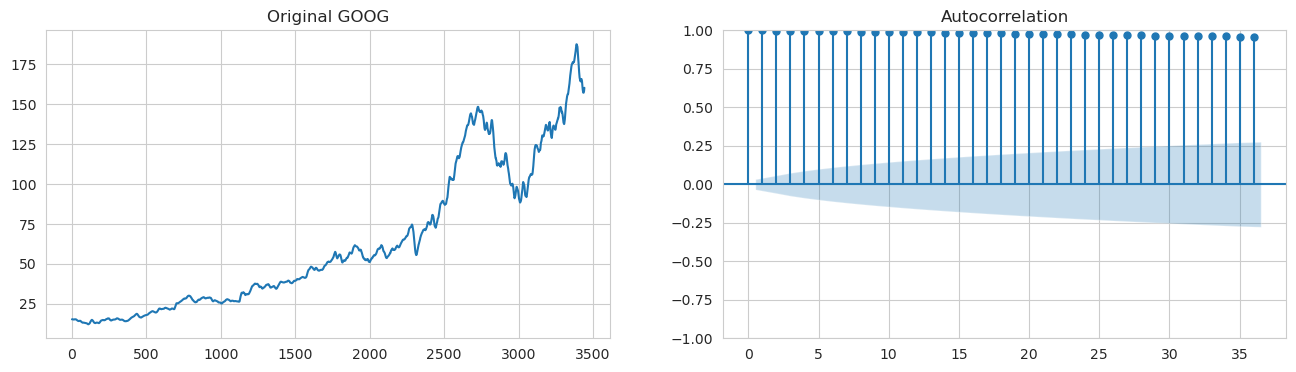

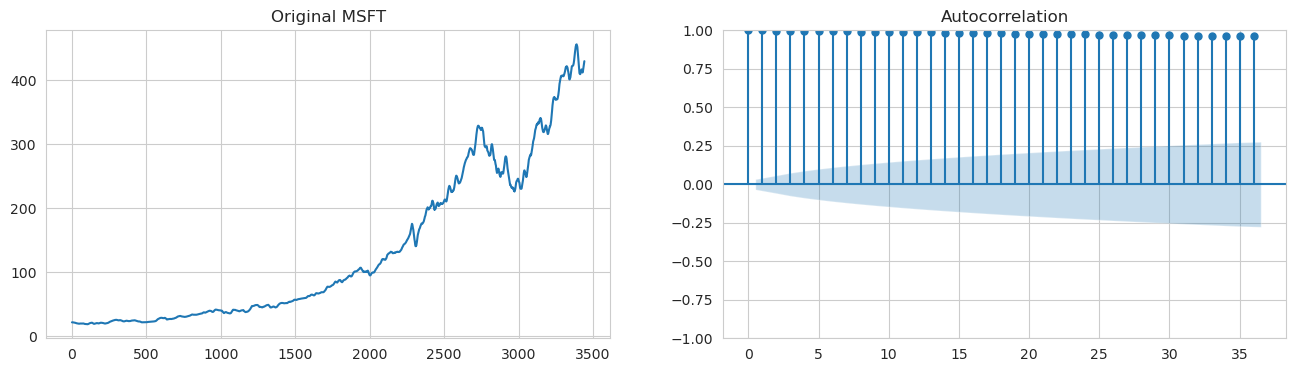

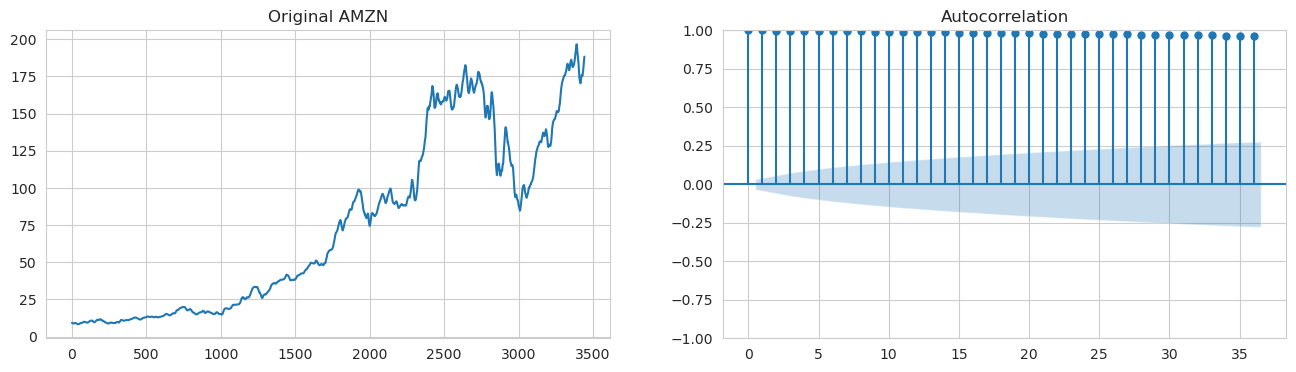

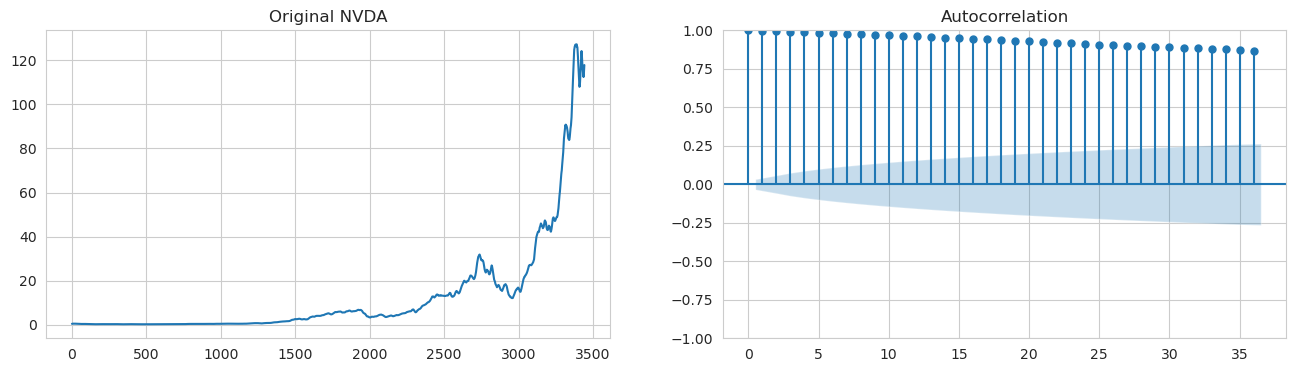

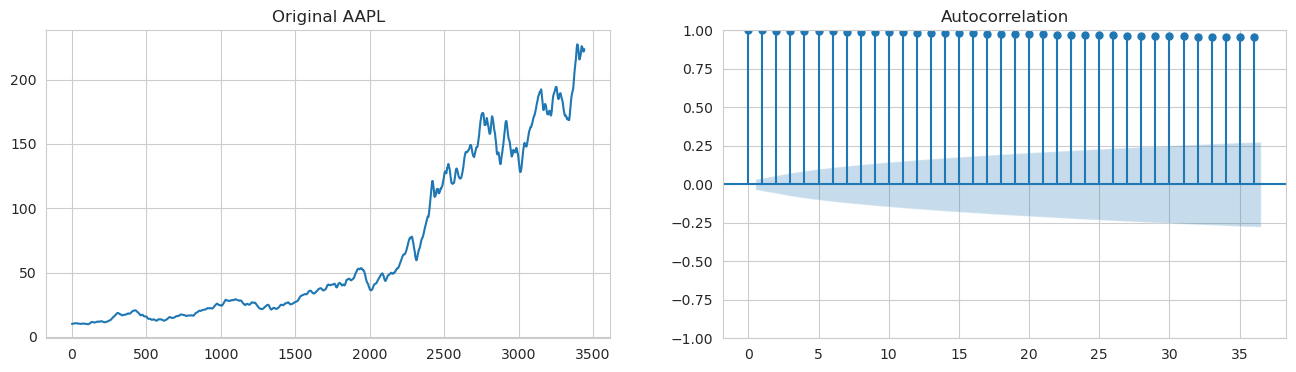

In [95]:
for i in range(len(df_close_sma)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(df_close_sma[i])
    ax1.set_title(f"Original {stock_symbols[i]}")
    plot_acf(df_close_sma[i], ax=ax2);

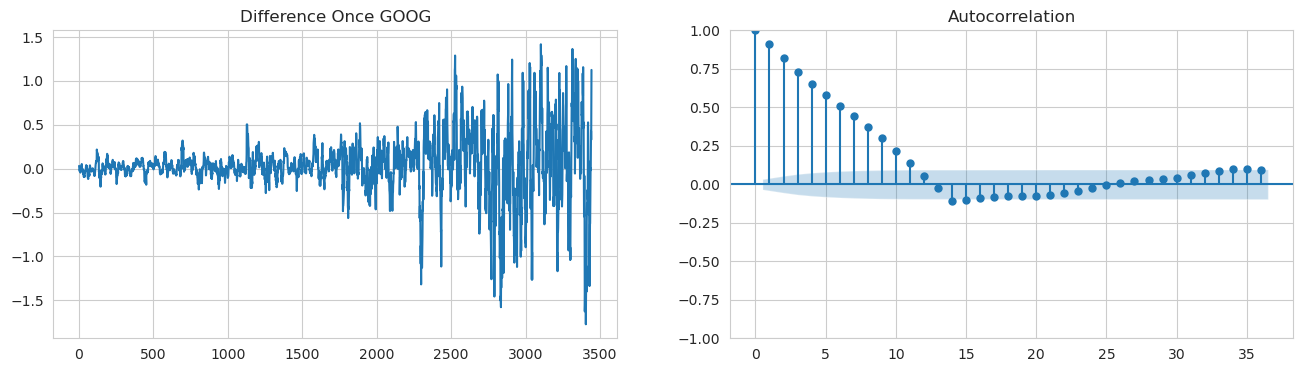

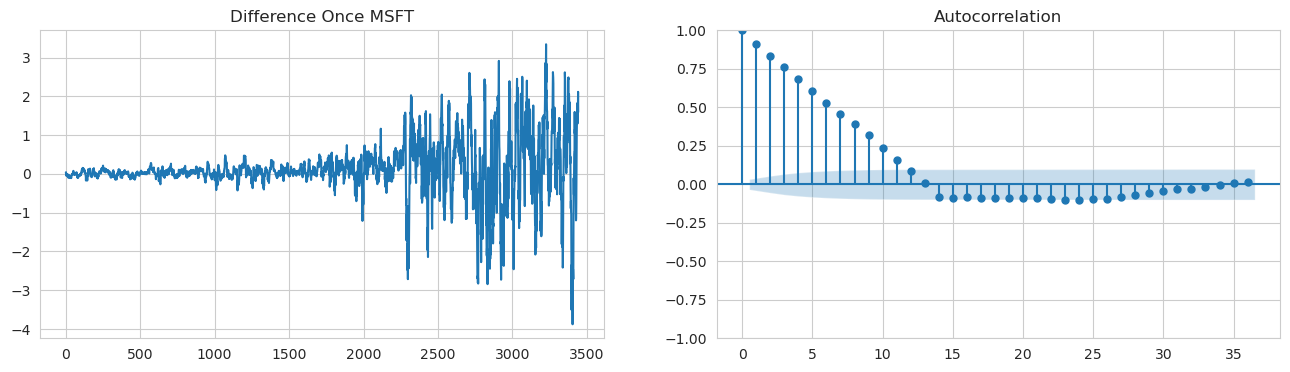

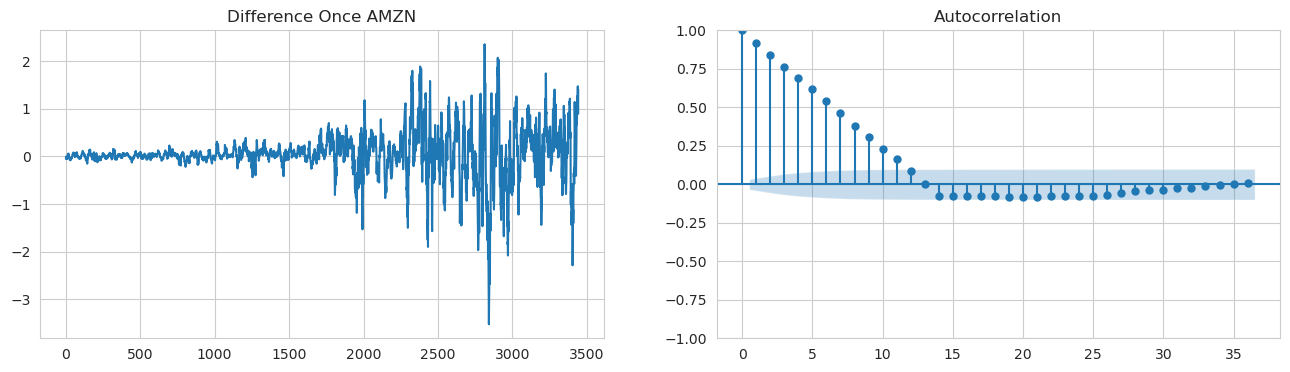

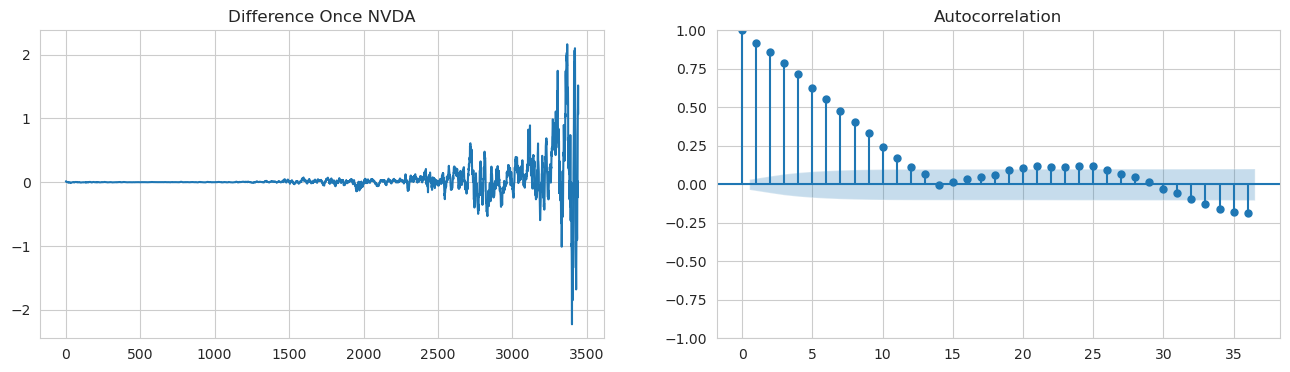

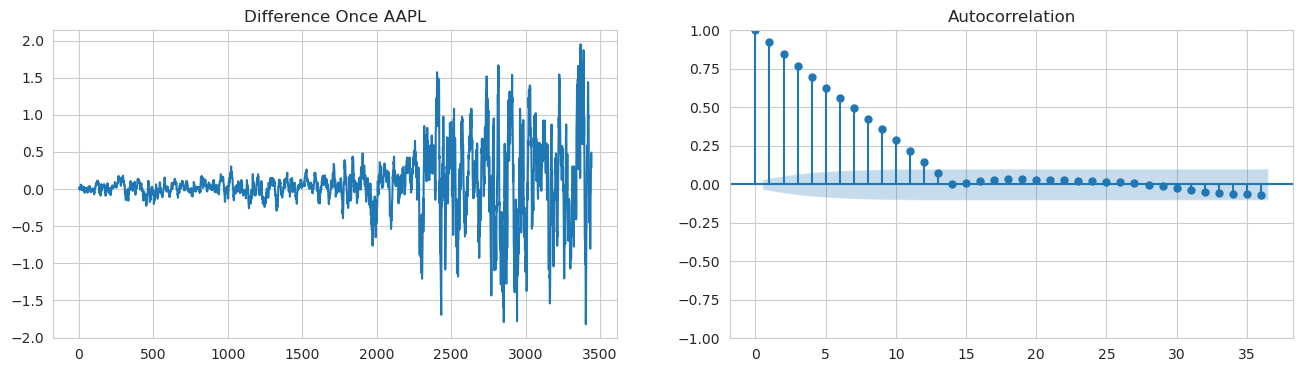

In [96]:
for i in range(len(df_close_sma)):
    diff1 = df_close_sma[i].Close.diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Difference Once {stock_symbols[i]}")
    plot_acf(diff1, ax=ax2);

In [97]:
ndif = [ndiffs(df_close_sma[i], test="adf") for i in range(len(df_close_sma))]
print("ndif", ndif)

ndif [1, 1, 1, 1, 1]


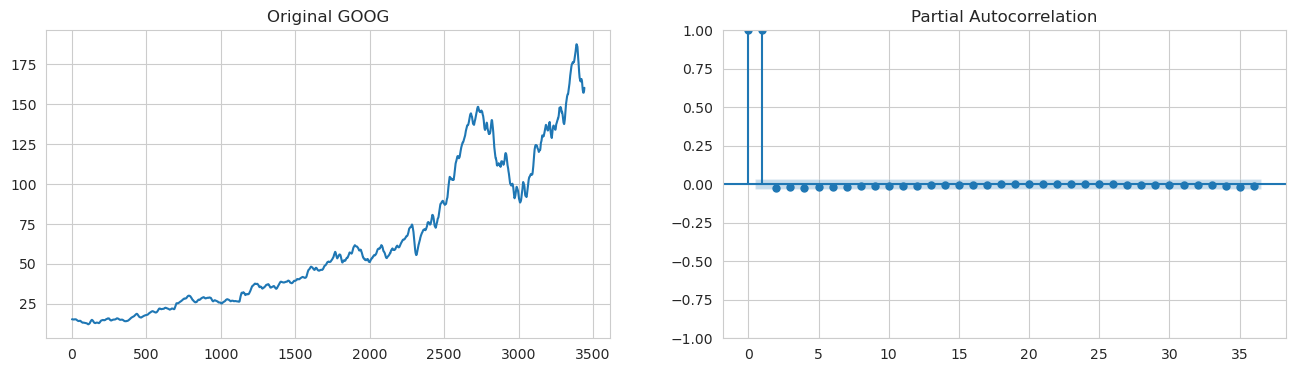

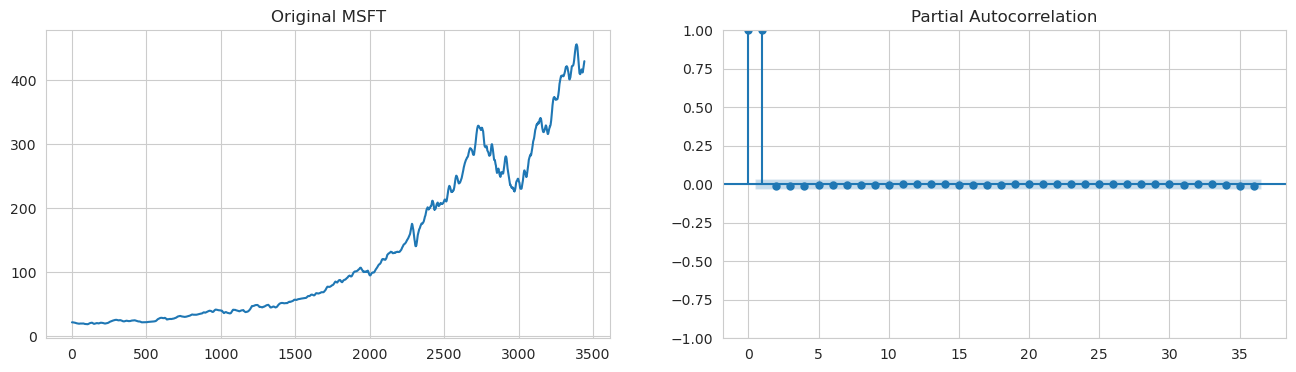

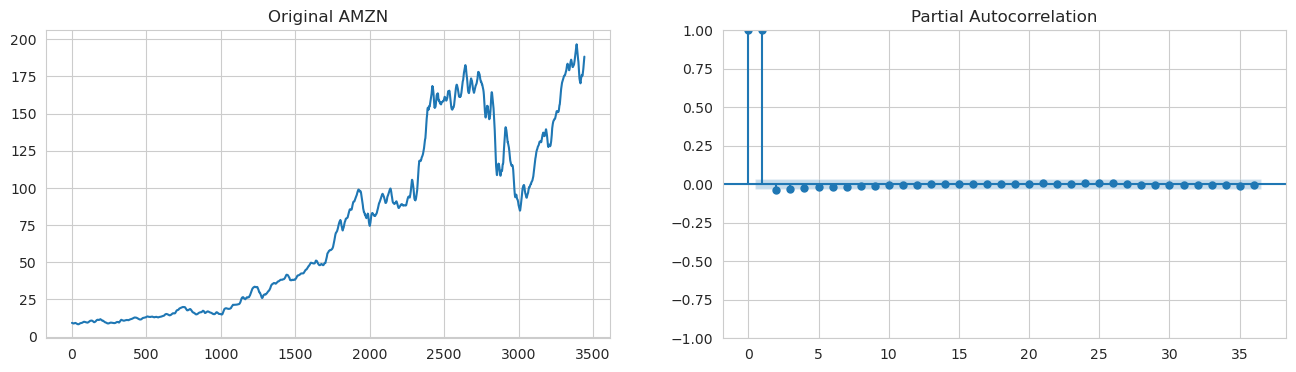

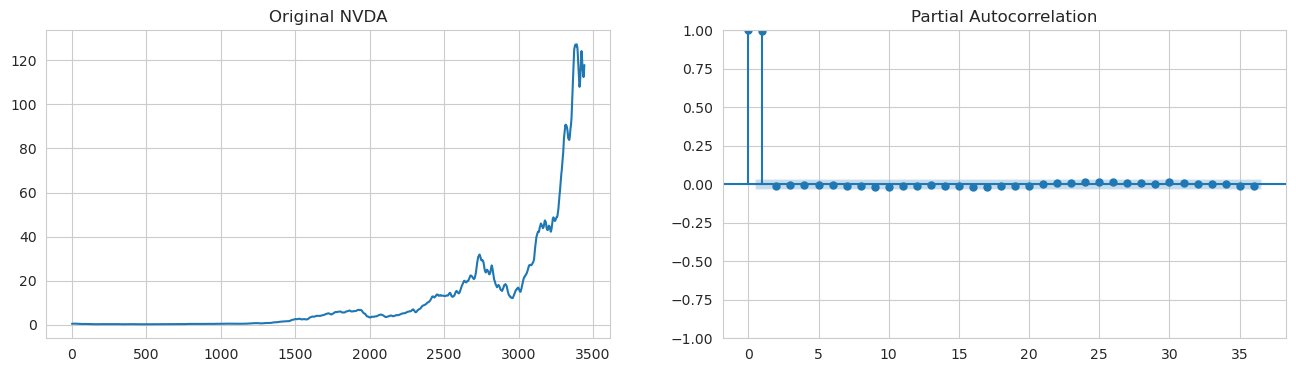

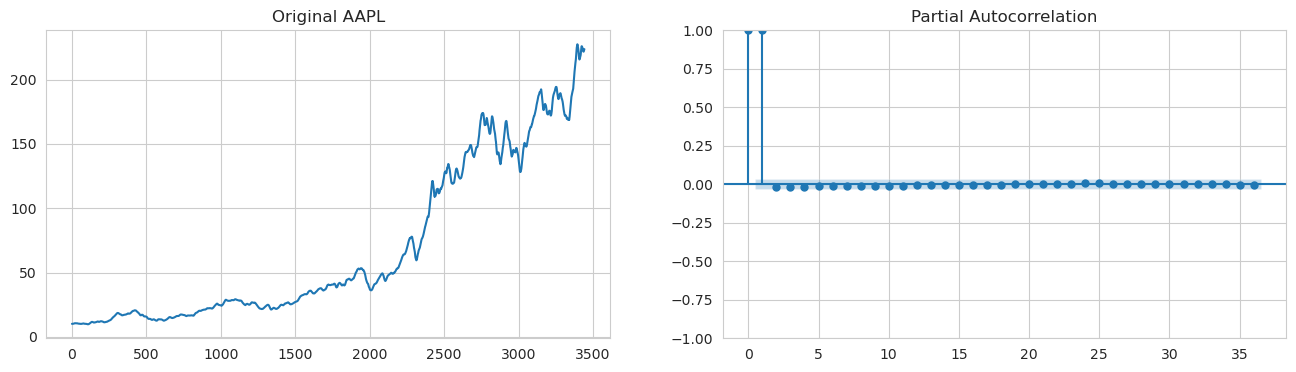

In [98]:
for i in range(len(df_close_sma)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(df_close_sma[i].Close)
    ax1.set_title(f"Original {stock_symbols[i]}")
    plot_pacf(df_close_sma[i].Close, ax=ax2);

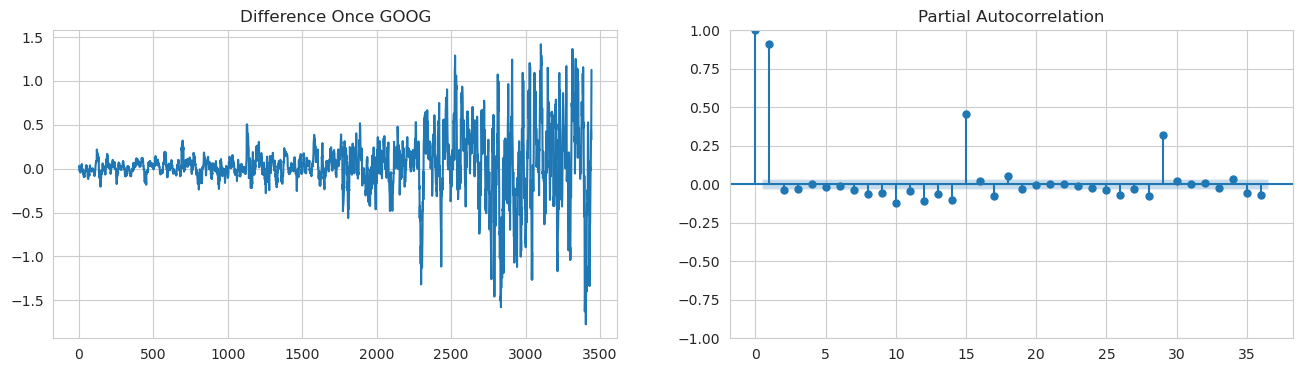

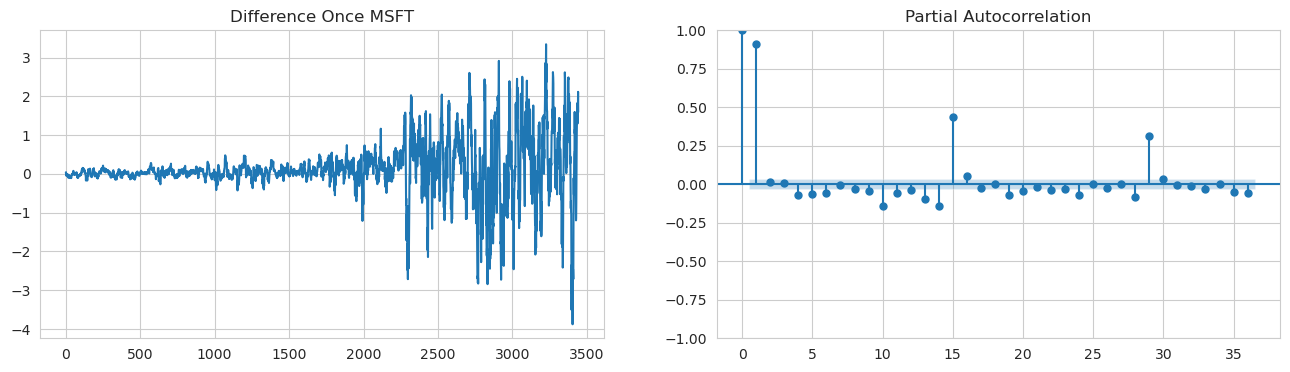

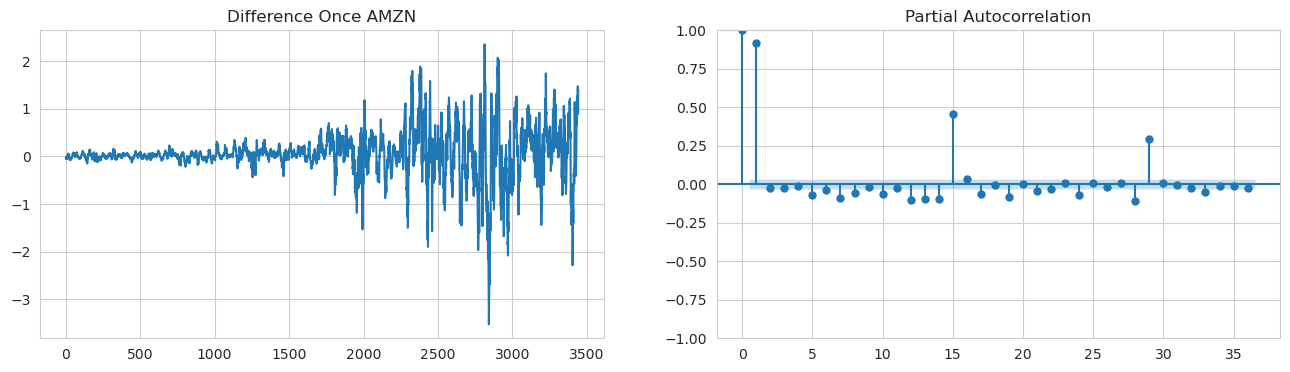

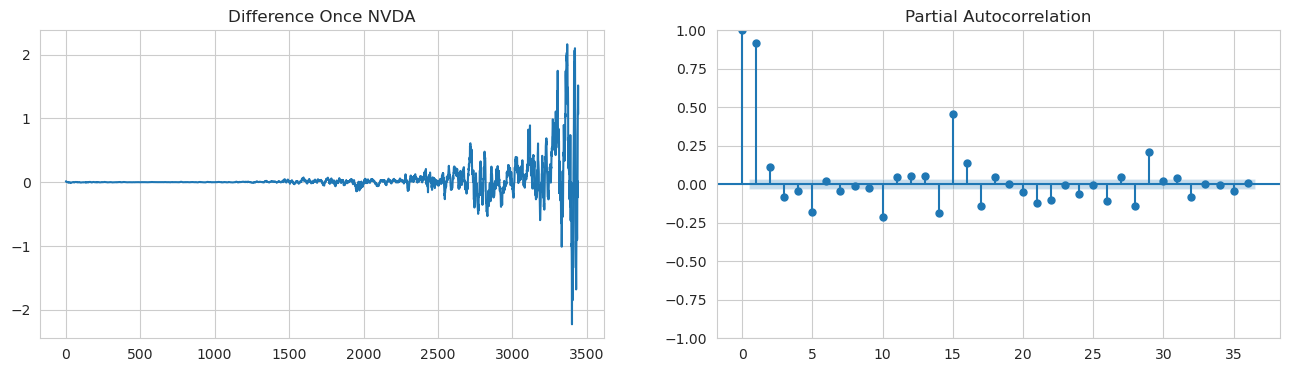

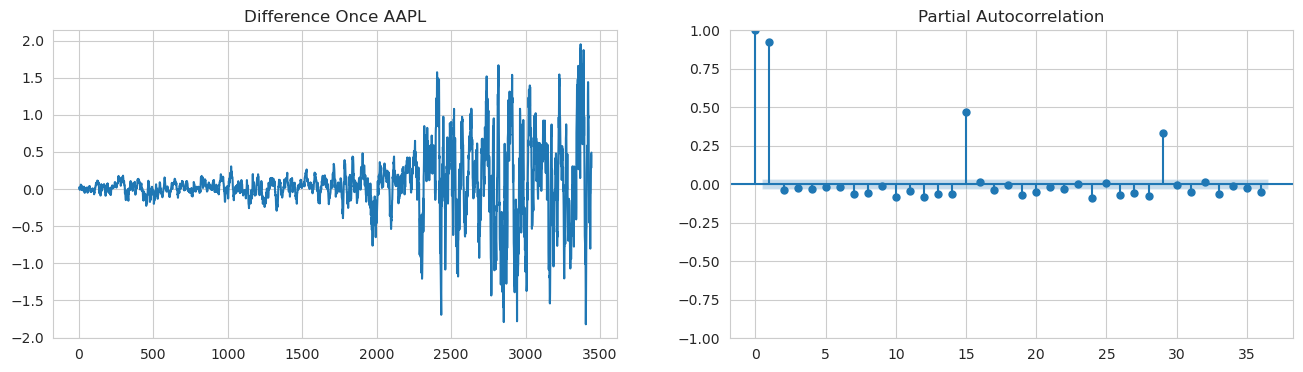

In [99]:
for i in range(len(df_close_sma)):
    diff1 = df_close_sma[i].Close.diff().dropna()

    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Difference Once {stock_symbols[i]}")
    plot_pacf(diff1, ax=ax2);

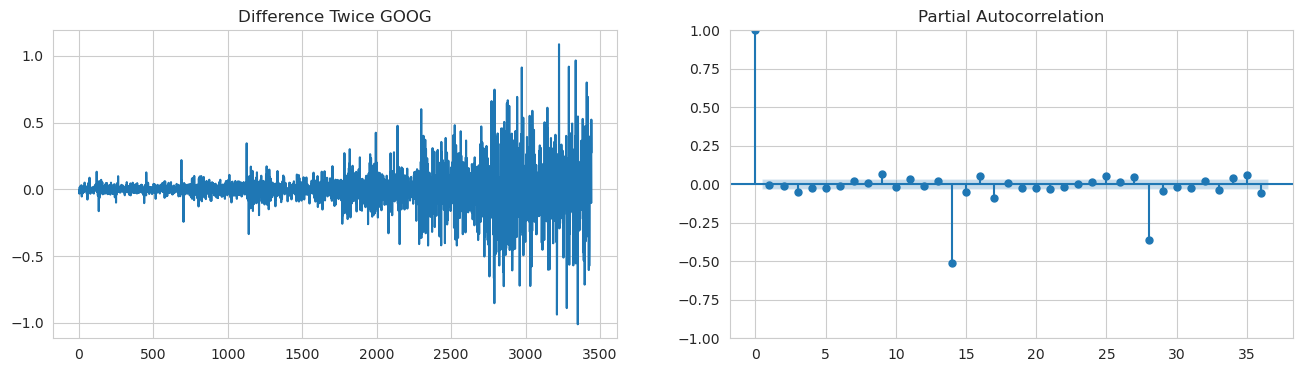

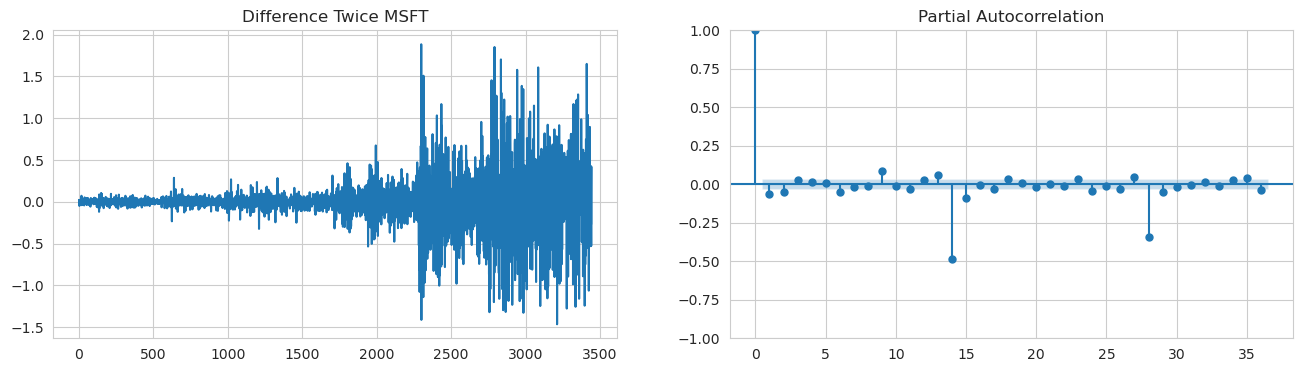

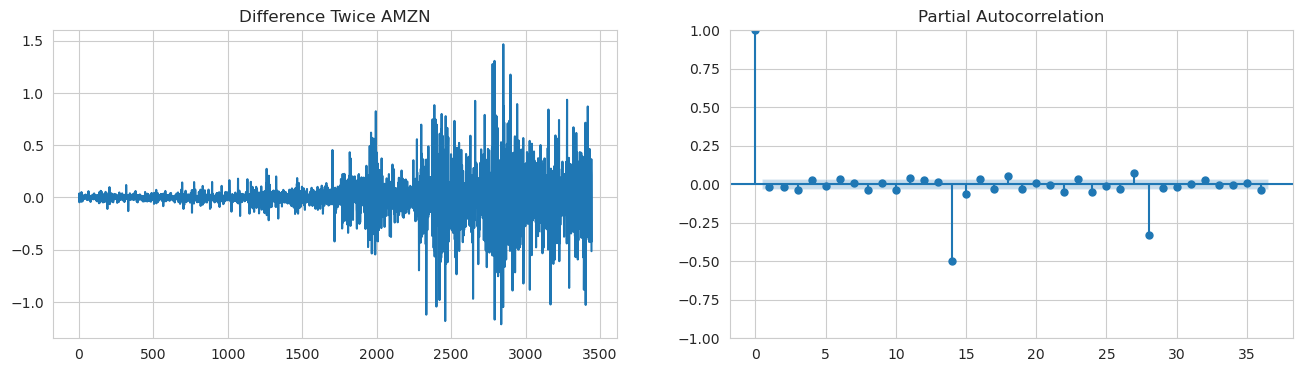

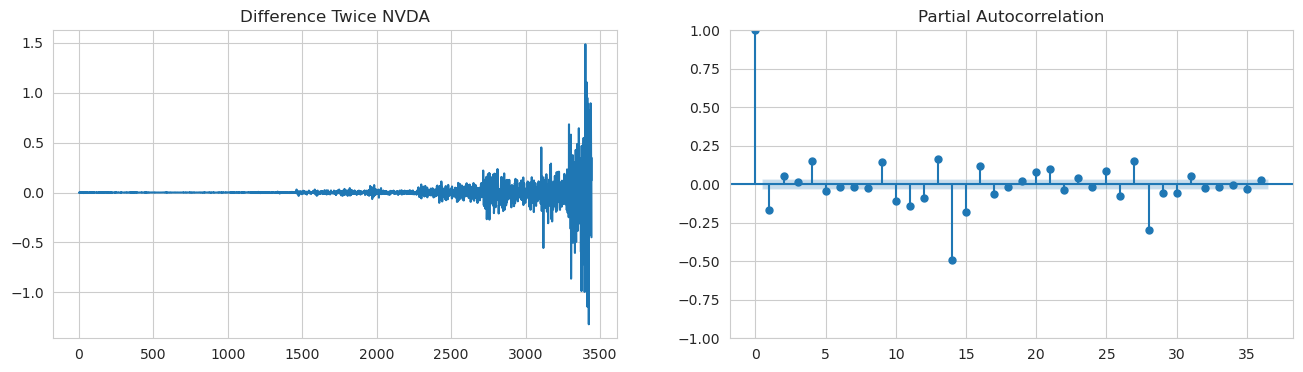

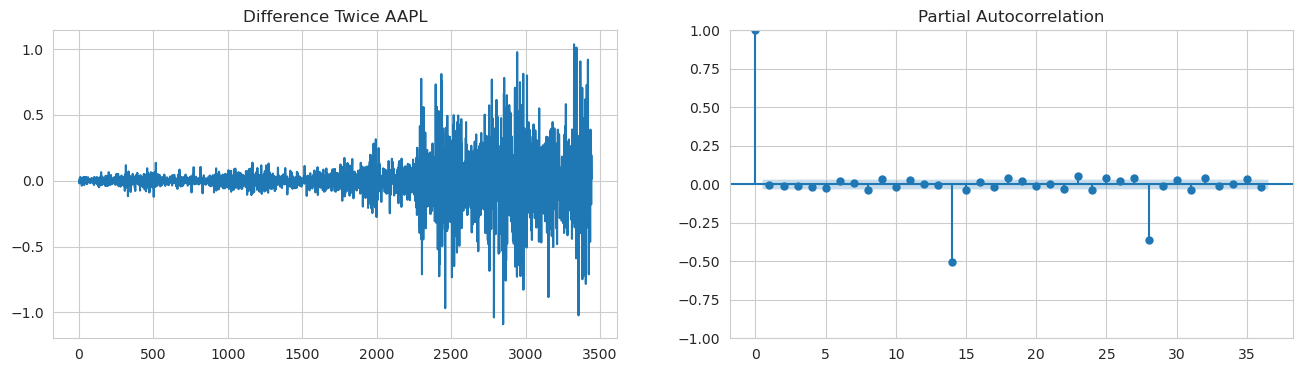

In [100]:
for i in range(len(df_close_sma)):
    diff2 = df_close_sma[i].Close.diff().diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff2)
    ax1.set_title(f"Difference Twice {stock_symbols[i]}")
    plot_pacf(diff2, ax=ax2);

In [71]:
# orderr = auto_arima(df[0].Close, trace=True).get_params().get("order")
# print(orderr)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12156.413, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12154.912, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12154.797, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12157.727, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12156.168, Time=2.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12155.779, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12150.697, Time=2.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12150.076, Time=2.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12149.251, Time=0.81 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=12151.027, Time=0.97 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12149.240, Time=5.65 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12151.053, Time=5.92 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=12151.368, Time=4.06 sec
 ARIMA(0,1,5)(0,0,0)[0] i

In [101]:
arima_order = {}
for i in range(len(df_close_sma)):
    print(f"Stock name: {stock_symbols[i]}")
    arima_order[i] = auto_arima(df_close_sma[i].Close, trace=True).get_params().get("order")
    print(f"ARIMA Order for {stock_symbols[i]}: {arima_order[i]}")

Stock name: GOOG
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3767.204, Time=1.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2285.281, Time=0.59 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3761.564, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-641.382, Time=1.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2336.530, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3769.184, Time=1.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2076.292, Time=2.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3765.523, Time=1.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3767.210, Time=6.43 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2775.371, Time=2.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3790.992, Time=2.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3766.048, Time=0.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3767.470, Time=2.96 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3769.321, Time=0.58 sec
 ARIM

In [102]:
arima_result = {}
for i in range(len(df_close_sma)):
    model = sm.ARIMA(df_close_sma[i].Close, order=arima_order[i])
    arima_result[i] = model.fit()
    print(f"\n ARIMA Results for {stock_symbols[i]}:\n {arima_result[i].summary()}")


 ARIMA Results for GOOG:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3443
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1898.859
Date:                Mon, 25 Nov 2024   AIC                          -3789.718
Time:                        19:52:49   BIC                          -3765.142
Sample:                             0   HQIC                         -3780.940
                               - 3443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8199      0.022     84.002      0.000       1.777       1.862
ar.L2         -0.8362      0.019    -43.474      0.000      -0.874      -0.799
ma.L1         -0.8713    

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 ARIMA Results for NVDA:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3443
Model:                 ARIMA(5, 2, 1)   Log Likelihood                3199.367
Date:                Mon, 25 Nov 2024   AIC                          -6384.734
Time:                        19:52:56   BIC                          -6341.730
Sample:                             0   HQIC                         -6369.373
                               - 3443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8151      0.006    142.890      0.000       0.804       0.826
ar.L2          0.1928      0.006     33.727      0.000       0.182       0.204
ar.L3         -0.0152    

In [76]:
# result.forecast(10)
# residuals = pd.DataFrame(result.resid)

In [78]:
# fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
# ax1.plot(pd.DataFrame(result.resid))
# ax2.hist(pd.DataFrame(result.resid), density=True)


 ARIMA Residuals for GOOG:


 ARIMA Residuals for MSFT:


 ARIMA Residuals for AMZN:


 ARIMA Residuals for NVDA:


 ARIMA Residuals for AAPL:



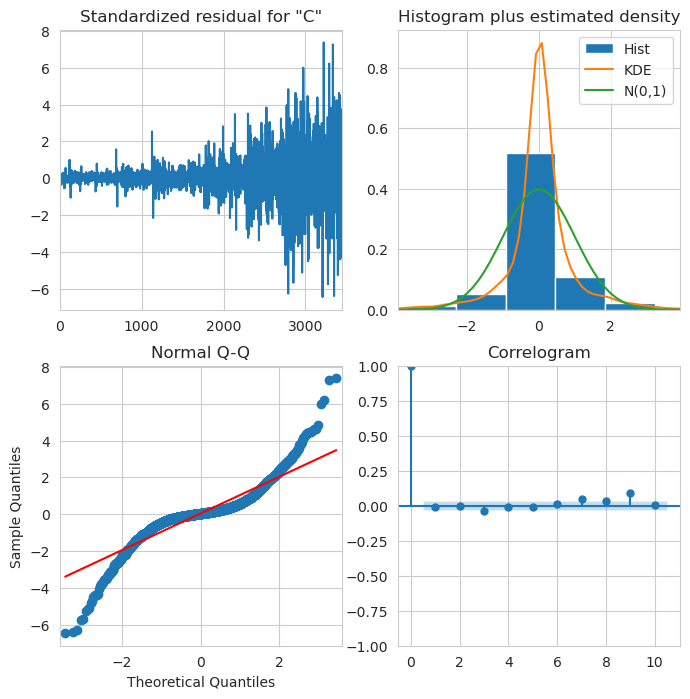

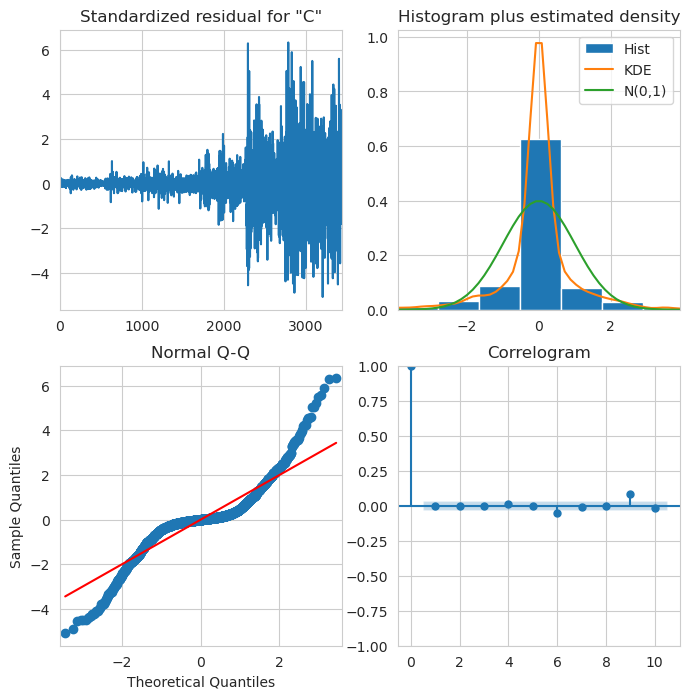

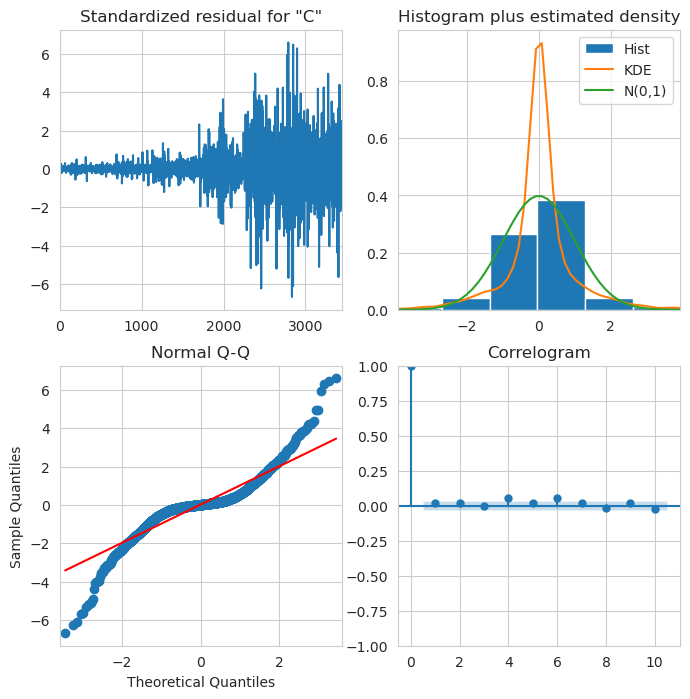

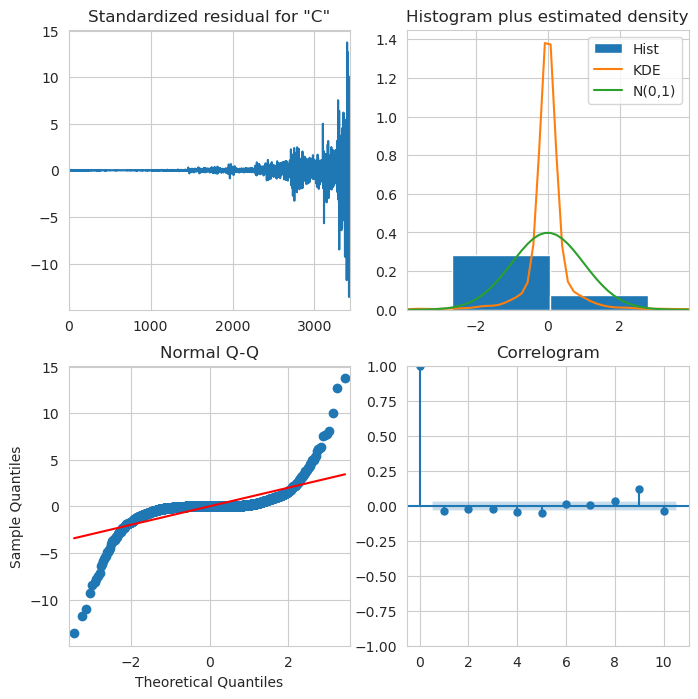

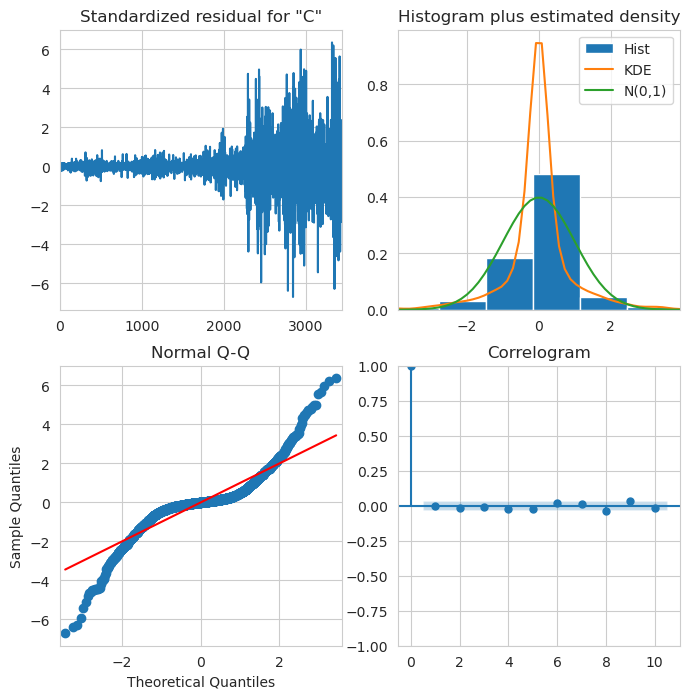

In [103]:
for i in range(len(df_close_sma)):
    arima_result[i].plot_diagnostics(figsize = (8,8))
    print(f"\n ARIMA Residuals for {stock_symbols[i]}:\n")



 Last 100 days stock Closing price for GOOG


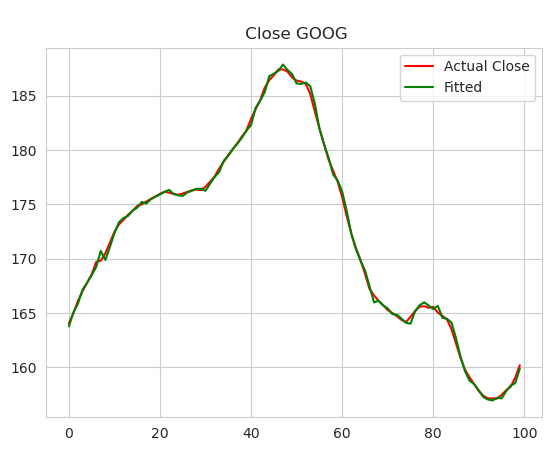


 Last 100 days stock Closing price for MSFT


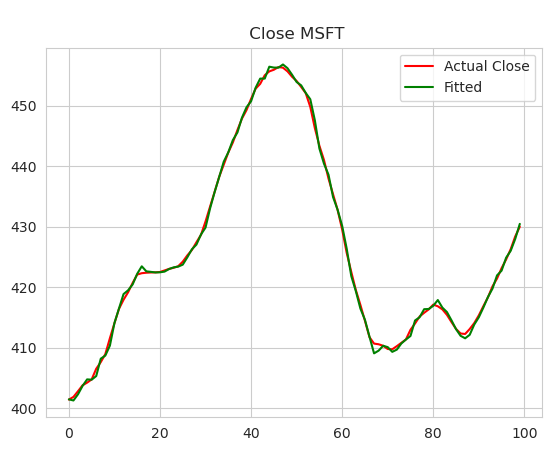


 Last 100 days stock Closing price for AMZN


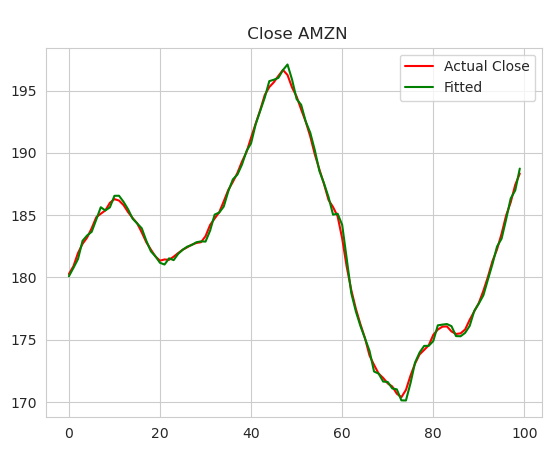


 Last 100 days stock Closing price for NVDA


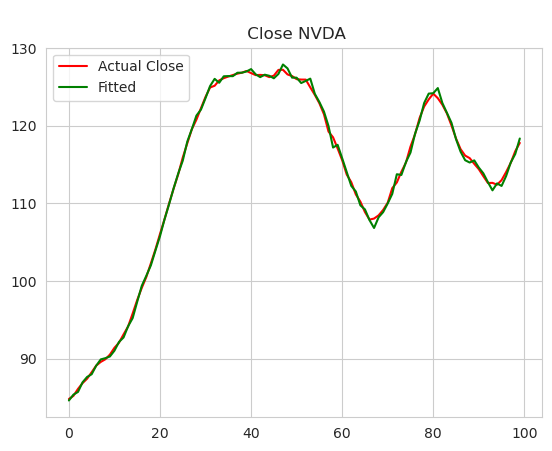


 Last 100 days stock Closing price for AAPL


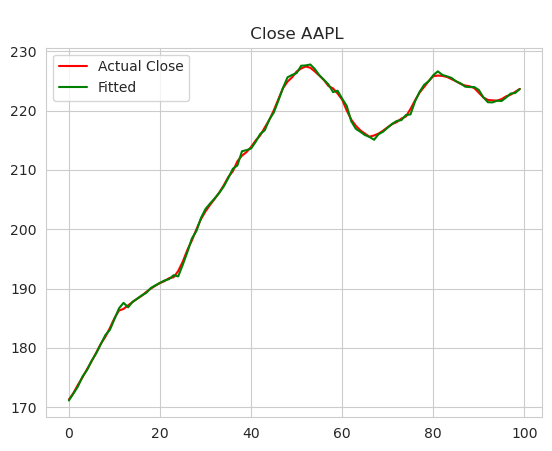

In [104]:
for i in range(len(df_close_sma)):
    print(f"\n Last 100 days stock Closing price for {stock_symbols[i]}")
    plt.plot(range(100), df_close_sma[i].Close[(len(df_close_sma[i])-100):], color='r', label='Actual Close')
    plt.plot(range(100), arima_result[i].fittedvalues[(len(df_close_sma[i])-100):], color='g', label='Fitted')
    plt.legend()
    plt.title(f"\n Close {stock_symbols[i]}")
    plt.show()

In [329]:
train = {}
test = {}
train_vol = {}
test_vol = {}
train_gss = {}
test_gss = {}
for i in range(len(df_close_sma)):
    n = 0
    n = int(len(df_close_sma[i])*0.95)
    train[i] = df_close_sma[i][:n]
    test[i] = df_close_sma[i][n:]
    print("sma",len(train[i]), len(test[i]))
for i in range(len(df_vol)):
    n = 0
    n = int(len(df_vol[i])*0.95)
    train_vol[i] = df_vol[i][:n]
    test_vol[i] = df_vol[i][n:]
    print("vol",len(train_vol[i]), len(test_vol[i]))
for i in range(len(df_sma_gss)):
    n = 0
    n = int(len(df_sma_gss[i])*0.95)
    train_gss[i] = df_sma_gss[i][:n]
    test_gss[i] = df_sma_gss[i][n:]
    print("gss",len(train_gss[i]), len(test_gss[i]))

sma 3270 173
sma 3270 173
sma 3270 173
sma 3270 173
sma 3270 173
vol 3270 173
vol 3270 173
vol 3270 173
vol 3270 173
vol 3270 173
gss 3270 173
gss 3270 173
gss 3270 173
gss 3270 173
gss 3270 173


In [330]:
for i in range(len(df_close_sma)):
    result = adfuller(train[i].Close.dropna())
    print(f"For {stock_symbols[i]}")
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

For GOOG
ADF statistic: 0.42072283483248085
p-value: 0.9822535768095777
For MSFT
ADF statistic: 1.7050298993146094
p-value: 0.9981408259427789
For AMZN
ADF statistic: -0.5687811612835565
p-value: 0.877881333008081
For NVDA
ADF statistic: 3.2937338279716997
p-value: 1.0
For AAPL
ADF statistic: 0.8535144942900784
p-value: 0.9924526787048981


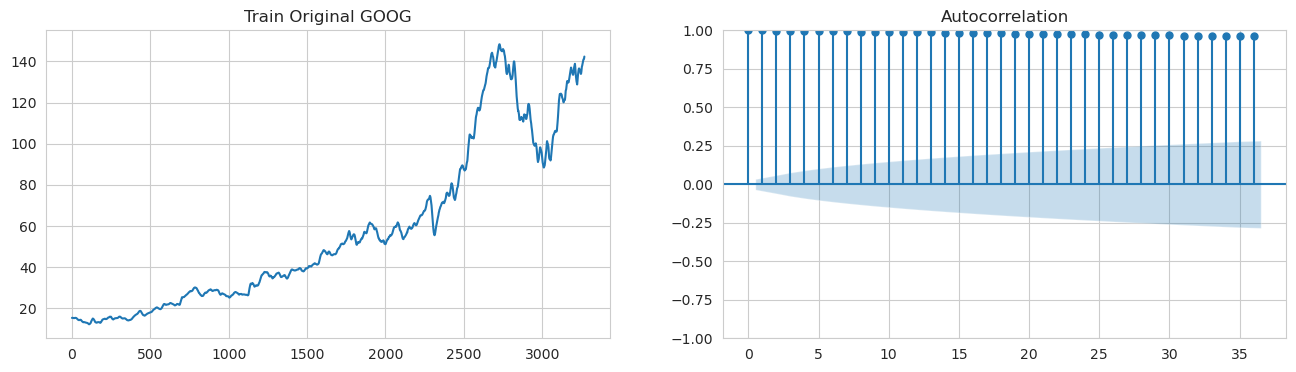

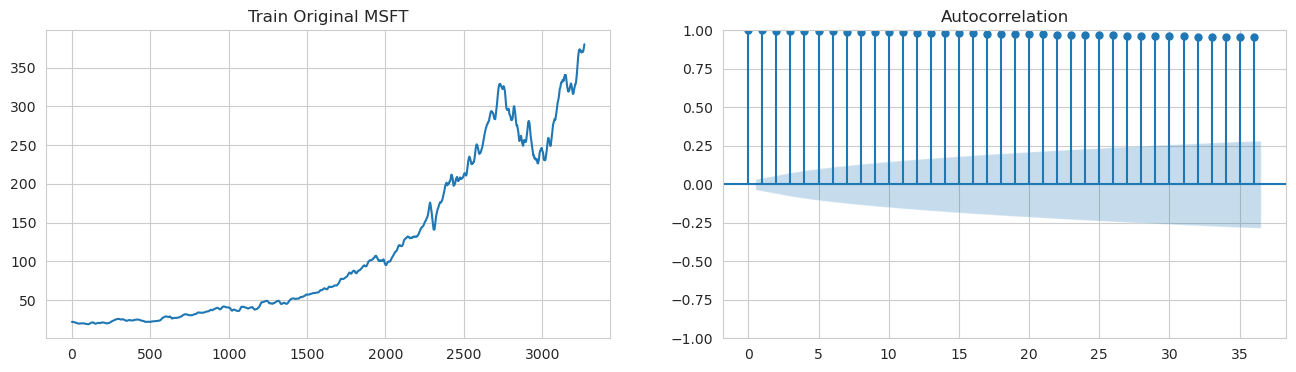

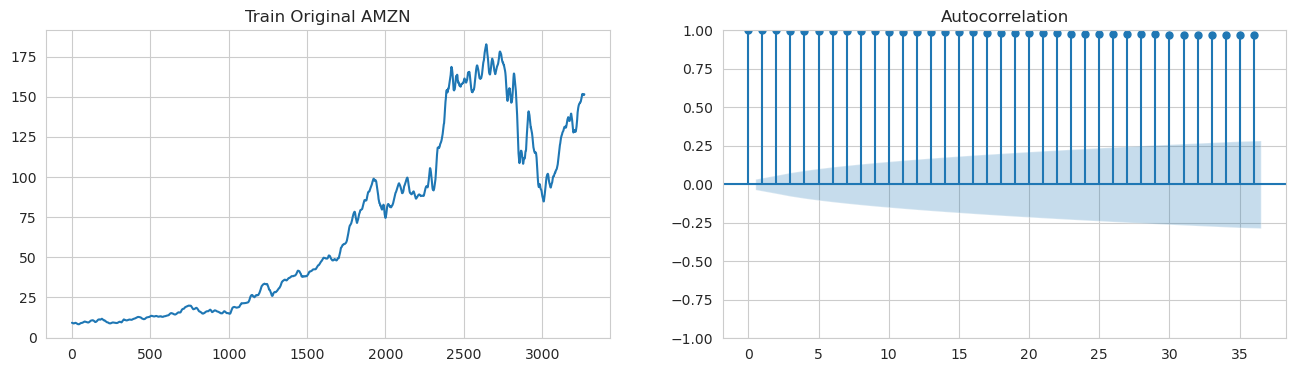

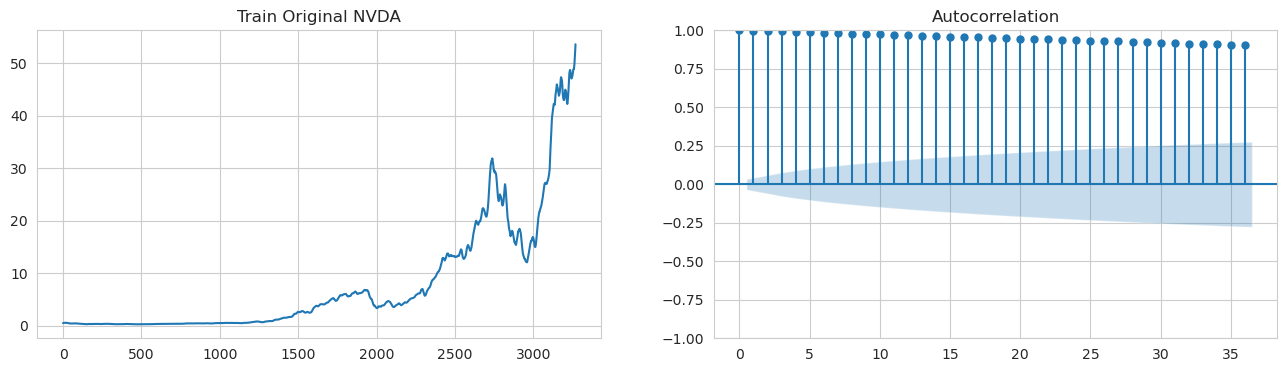

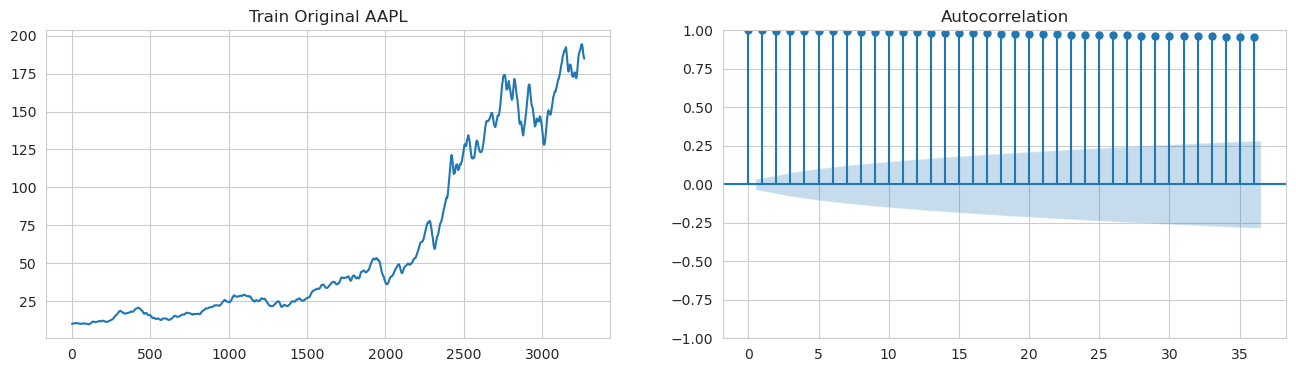

In [107]:
for i in range(len(train)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(train[i].Close)
    ax1.set_title(f"Train Original {stock_symbols[i]}")
    plot_acf(train[i].Close, ax=ax2);

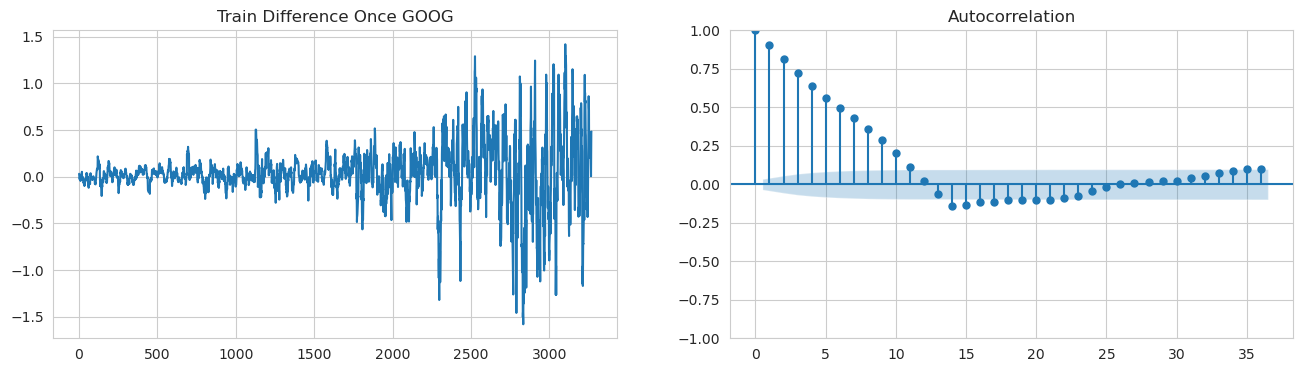

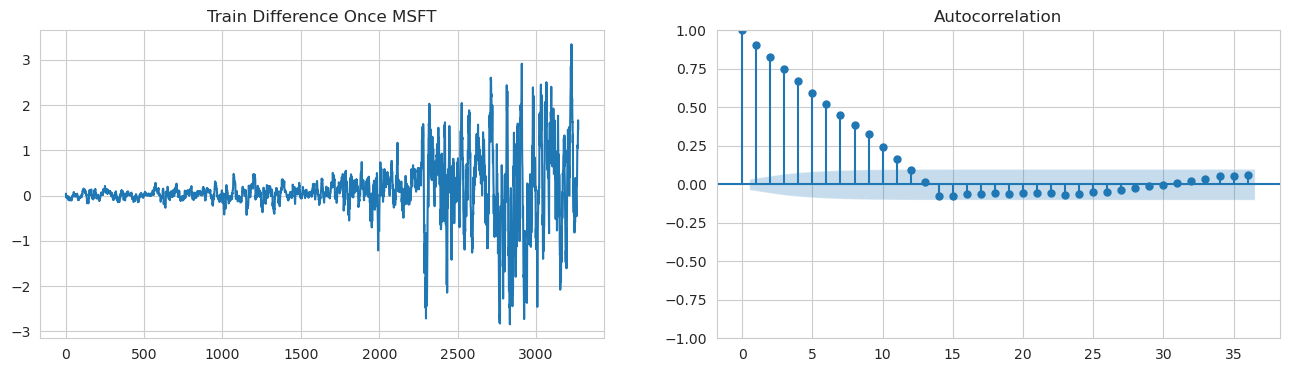

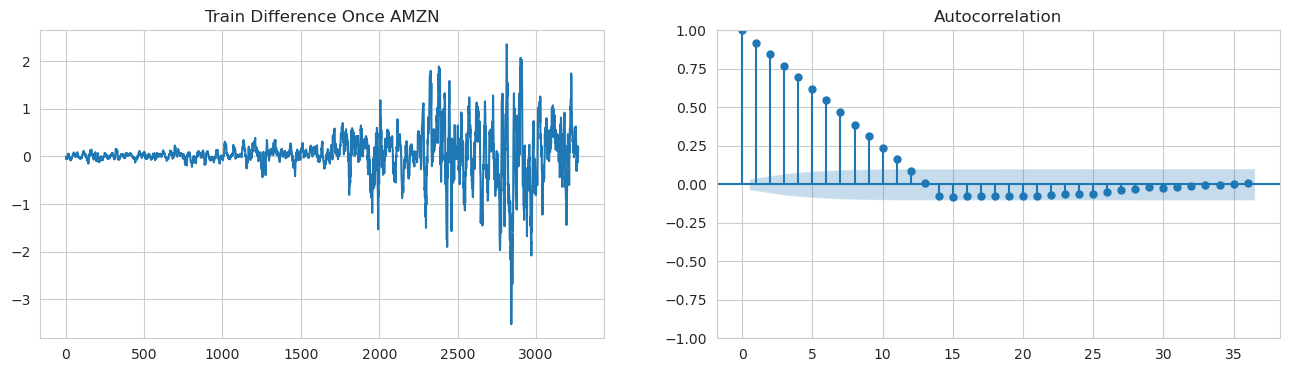

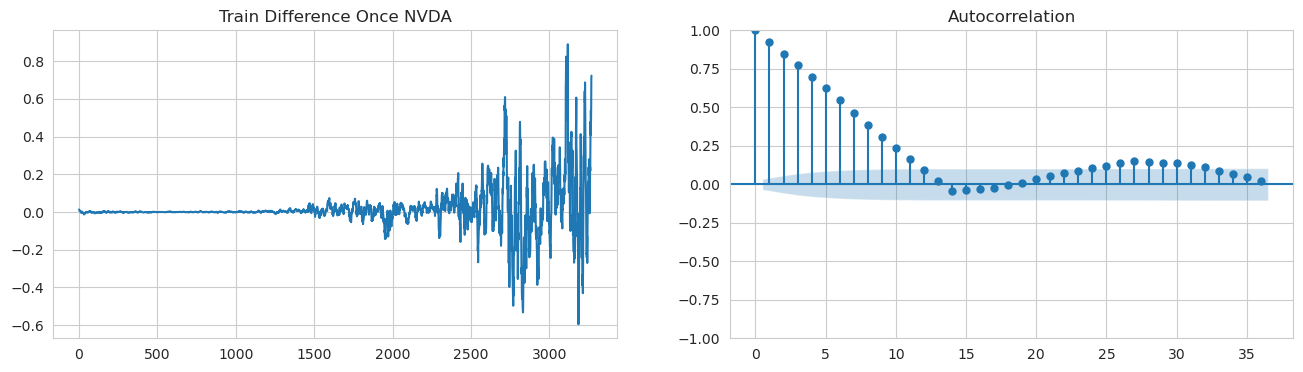

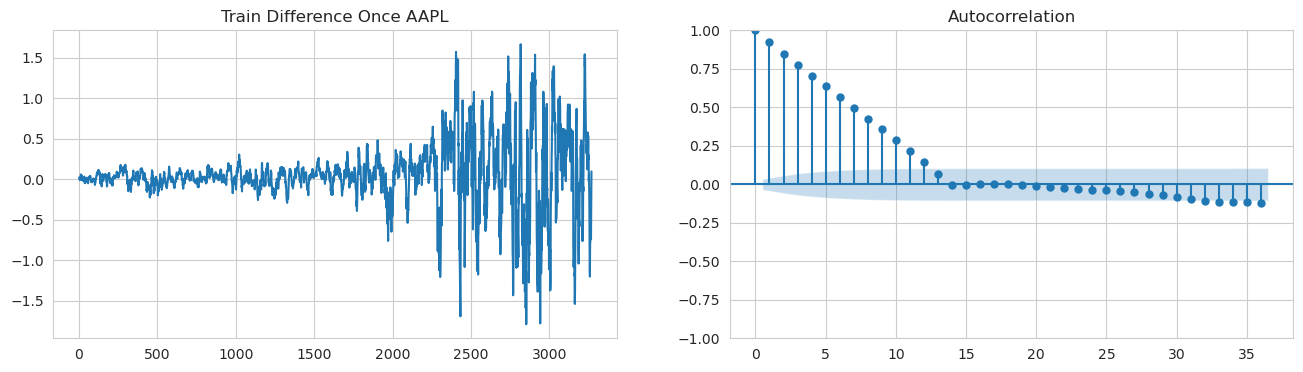

In [108]:
for i in range(len(train)):
    diff1 = train[i].Close.diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Train Difference Once {stock_symbols[i]}")
    plot_acf(diff1, ax=ax2);

In [109]:
ndif_train = [ndiffs(train[i].Close, test="adf") for i in range(len(df))]
print("ndif_train", ndif_train)

ndif_train [1, 1, 1, 1, 1]


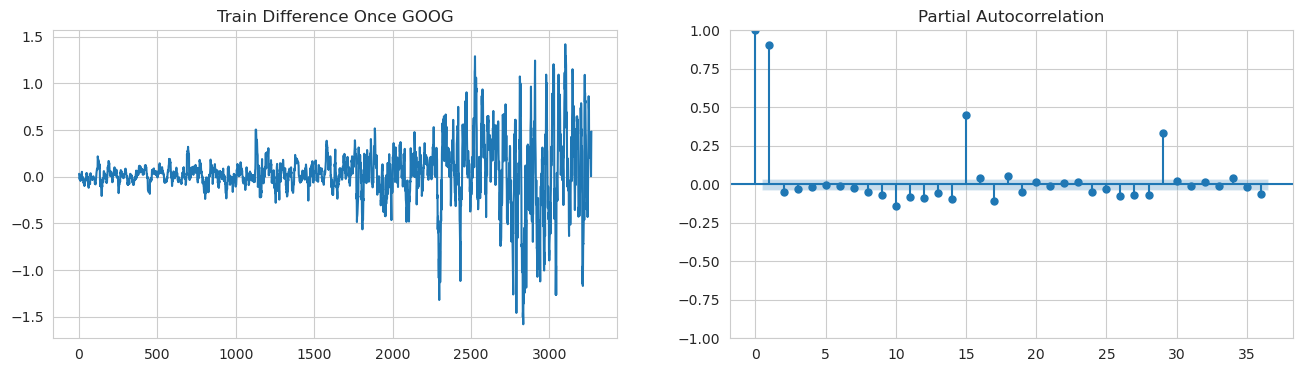

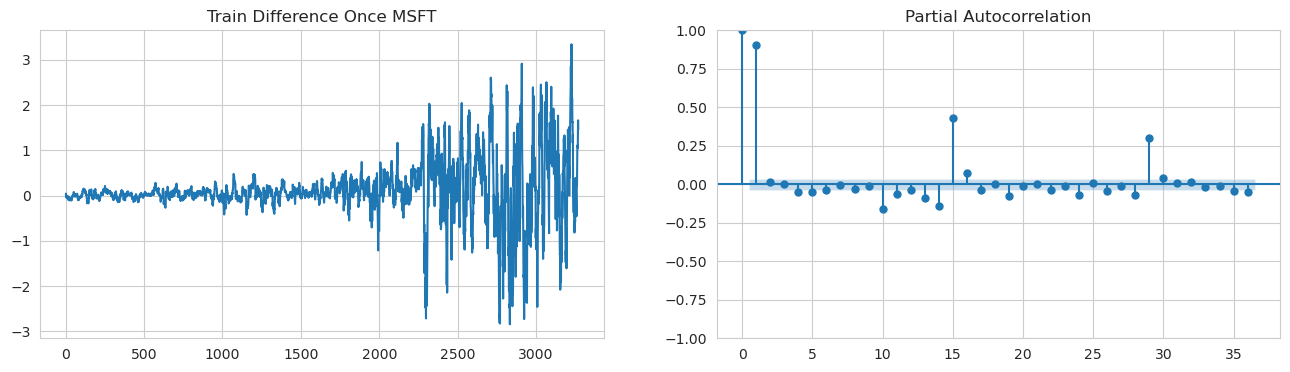

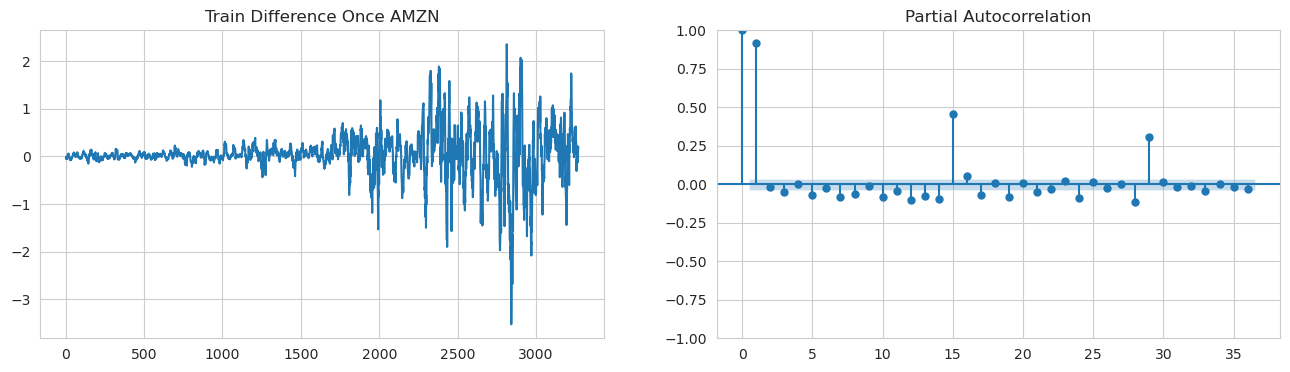

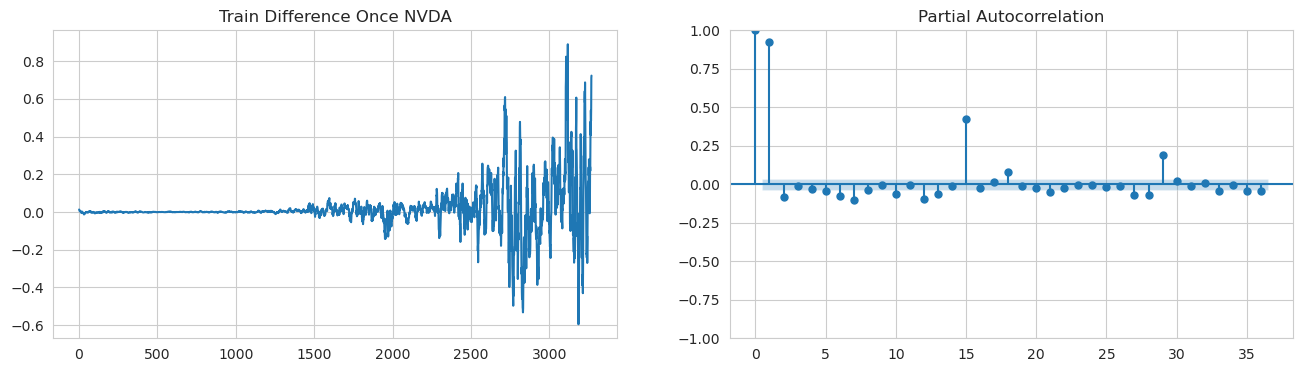

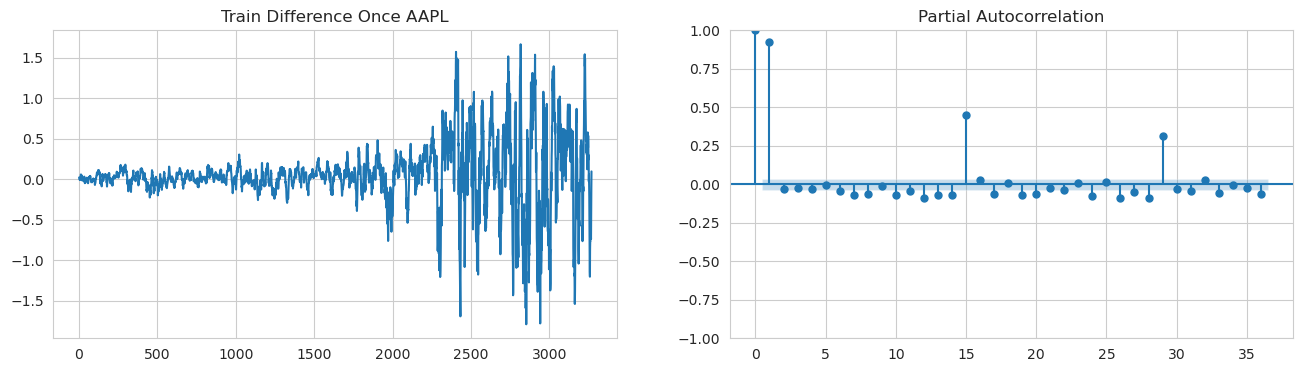

In [110]:
for i in range(len(train)):
    diff1 = train[i].Close.diff().dropna() 
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Train Difference Once {stock_symbols[i]}")
    plot_pacf(diff1, ax=ax2);

In [331]:
arima_model_train = {}
arima_order_train = {}
for i in range(len(train)):
    print(f"Stock name: {stock_symbols[i]}")
    arima_model_train[i] = auto_arima(train[i].Close, trace=True, exogenous=[train_gss[i]["weighted compound sentiment score"],train_vol[i].Volume])
    arima_order_train[i] = arima_model_train[i].get_params().get("order")
    print(f"Training Set ARIMA Order for {stock_symbols[i]}: {arima_order_train[i]}")

Stock name: GOOG
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4240.062, Time=5.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1459.356, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4208.998, Time=1.79 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1332.708, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1510.905, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4216.735, Time=1.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4242.094, Time=3.74 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4215.054, Time=0.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4215.655, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4236.390, Time=6.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-4217.382, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.75 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-4238.249, Time=1.64 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 32.144 seconds

In [332]:
arima_result_train = {}
for i in range(len(train)):
    model_train = sm.ARIMA(train[i].Close, order=arima_order_train[i])
    arima_result_train[i] = model_train.fit()
    print(f"\n Training Set ARIMA Results for {stock_symbols[i]}:\n {arima_result_train[i].summary()}")


 Training Set ARIMA Results for GOOG:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3270
Model:                 ARIMA(2, 1, 1)   Log Likelihood                2123.125
Date:                Tue, 26 Nov 2024   AIC                          -4238.249
Time:                        20:18:39   BIC                          -4213.880
Sample:                             0   HQIC                         -4229.522
                               - 3270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8149      0.022     83.252      0.000       1.772       1.858
ar.L2         -0.8323      0.019    -43.055      0.000      -0.870      -0.794
ma.L1       

/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 Training Set ARIMA Results for NVDA:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3270
Model:                 ARIMA(2, 2, 2)   Log Likelihood                5739.615
Date:                Tue, 26 Nov 2024   AIC                         -11469.229
Time:                        20:18:48   BIC                         -11438.769
Sample:                             0   HQIC                        -11458.320
                               - 3270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5818      0.018    -87.915      0.000      -1.617      -1.547
ar.L2         -0.8104      0.018    -44.088      0.000      -0.846      -0.774
ma.L1       

In [333]:
step_30=[30 for i in range(len(df))]
step=[len(test[i]) for i in range(len(df))]
step_30, step

([30, 30, 30, 30, 30], [173, 173, 173, 173, 173])

In [348]:
conf_int_30 = {}
fc_30 = {}
lower_30 = {}
upper_30 = {}
for i in range(len(df)):
    conf_int_30[i] = arima_result_train[i].get_forecast(step_30[i], exog=[train_gss[i]["weighted compound sentiment score"],train_vol[i].Volume]).conf_int(alpha=0.32)
    fc_30[i] = pd.Series(arima_result_train[i].get_forecast(step_30[i], exog=[train_gss[i]["weighted compound sentiment score"],train_vol[i].Volume]).predicted_mean, index = test[i][:step[i]].index)
    # fc_30[i] = pd.Series(arima_result_train[i].predict(step_30[i]), index = test[i][:step_30[i]].index)
    lower_30[i] = pd.Series(conf_int_30[i]['lower Close'], index = test[i][:step_30[i]].index)
    upper_30[i] = pd.Series(conf_int_30[i]['upper Close'], index = test[i][:step_30[i]].index)
    # print(conf_int_30[i])

In [349]:
conf_int = {}
fc = {}
lower = {}
upper = {}
for i in range(len(df)):
    conf_int[i] = arima_result_train[i].get_forecast(step[i], exog=[train_gss[i]["weighted compound sentiment score"],train_vol[i].Volume]).conf_int(alpha=0.32)
    fc[i] = pd.Series(arima_result_train[i].get_forecast(step[i], exog=[train_gss[i]["weighted compound sentiment score"],train_vol[i].Volume]).predicted_mean, index = test[i][:step[i]].index)
    lower[i] = pd.Series(conf_int[i]['lower Close'], index = test[i][:step[i]].index)
    upper[i] = pd.Series(conf_int[i]['upper Close'], index = test[i][:step[i]].index)
    # print(conf_int[i])

In [143]:
arima_result_train[0].get_forecast(10, exog=[train_gss[i]["weighted compound sentiment score"],train_vol[i].Volume]).conf_int(alpha=0.50)

,lower Close,upper Close
3270,142.699464,142.869903
3271,142.985511,143.358521
3272,143.207876,143.817958
3273,143.373422,144.245006
3274,143.488176,144.638241
3275,143.557691,144.997414
3276,143.587199,145.323099
3277,143.581647,145.616463
3278,143.545712,145.879097
3279,143.483783,146.112895


In [117]:
test_gss[0]

,weighted compound sentiment score
3270,0.0000
3271,0.0000
3272,0.1027
3273,0.0000
3274,0.0000
...,...
3438,0.0000
3439,0.0000
3440,0.0000
3441,0.0000


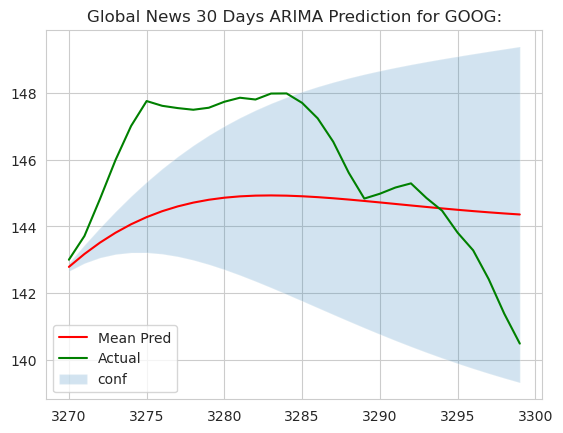

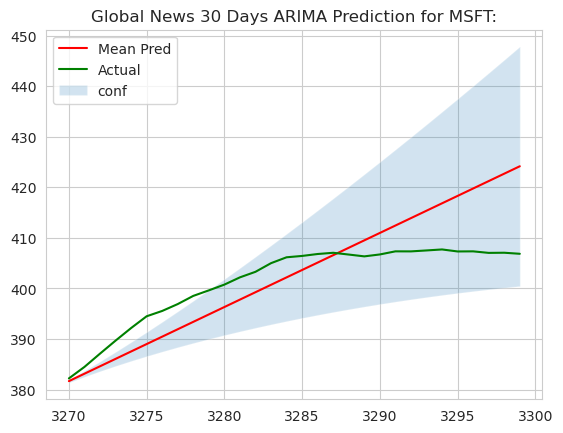

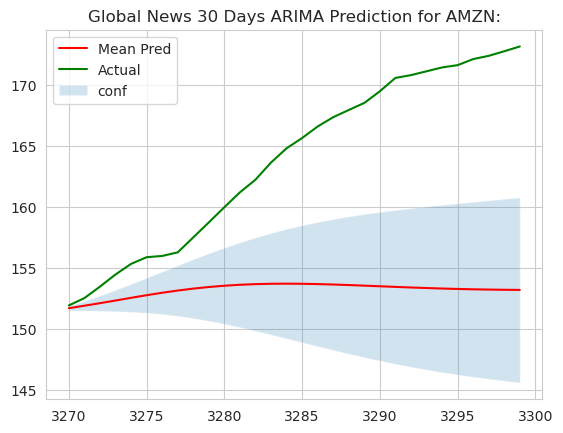

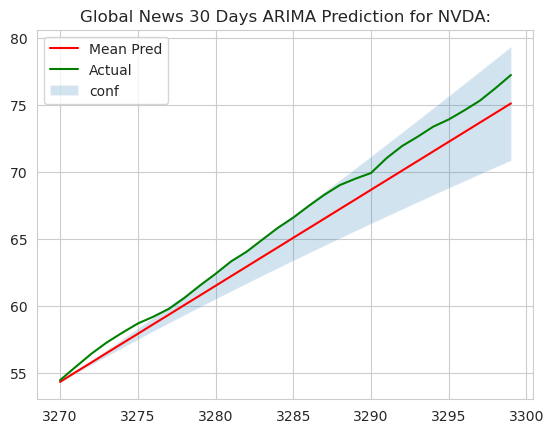

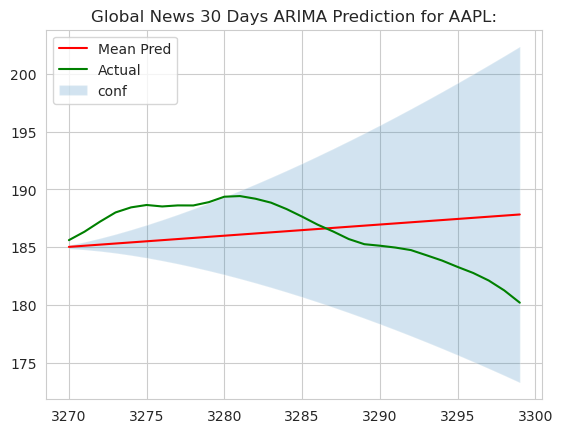

In [382]:
for i in range(len(df)):
    # plt.plot(arima_result_train[i].forecast(step_30[i]), color='r', label='Mean Pred')
    plt.plot(arima_result_train[i].get_forecast(step_30[i], exog=[train_gss[i]["weighted compound sentiment score"],train_vol[i].Volume]).predicted_mean, color='r', label='Mean Pred')
    plt.plot(test[i][:step_30[i]].Close, color='g', label='Actual')
    plt.fill_between(lower_30[i].index, lower_30[i], upper_30[i], alpha = 0.2, label='conf')
    plt.legend()
    plt.title(f"Global News 30 Days ARIMA Prediction for {stock_symbols[i]}:")
    plt.show()

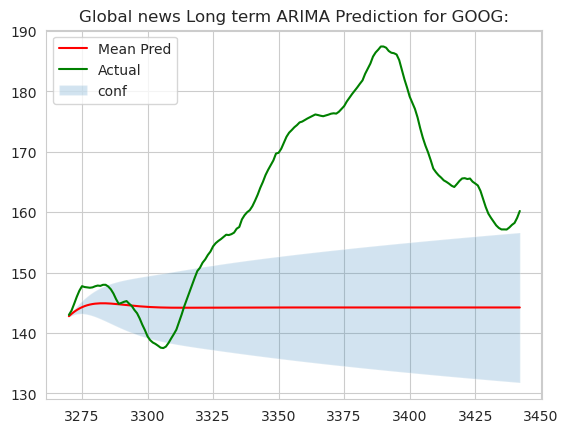

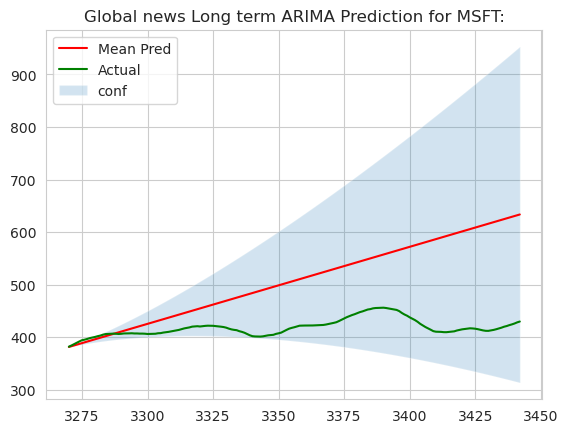

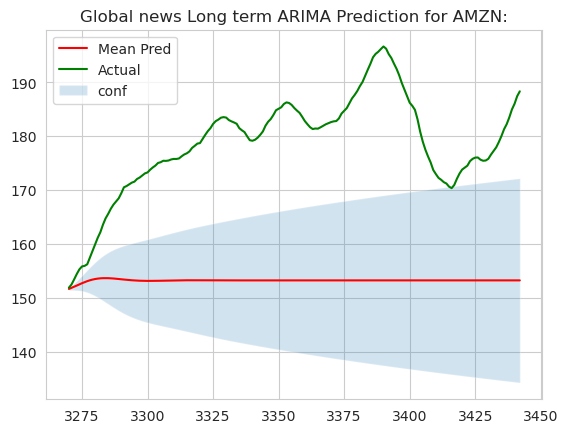

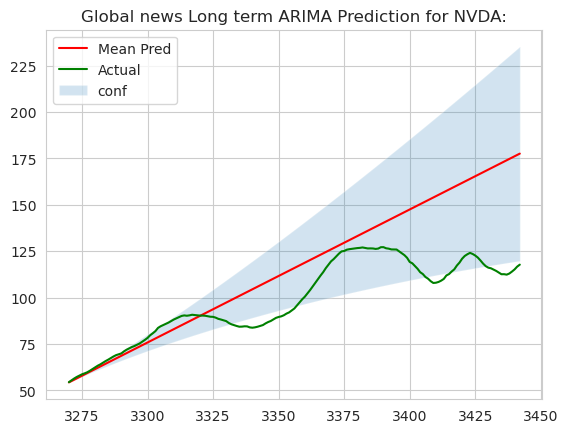

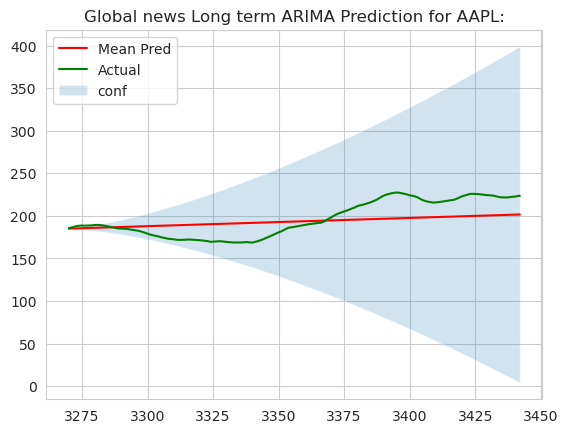

In [383]:
for i in range(len(df)):
    plt.plot(arima_result_train[i].get_forecast(step[i], exog=[train_gss[i]["weighted compound sentiment score"],train_vol[i].Volume]).predicted_mean, color='r', label='Mean Pred')
    plt.plot(test[i][:step[i]].Close, color='g', label='Actual')
    plt.fill_between(lower[i].index, lower[i], upper[i], alpha = 0.2, label='conf')
    plt.legend()
    plt.title(f"Global news Long term ARIMA Prediction for {stock_symbols[i]}:")
    plt.show()

In [389]:
#df_ARIMA_diff = [(train[i].Close - arima_result_train[i].fittedvalues)/(train[i].Close) for i in range(len(df))]
df_ARIMA_diff_30 = [((test[i][:step_30[i]].Close - fc[i][:step_30[i]]))/(test[i][:step_30[i]].Close) for i in range(len(df))]
df_ARIMA_diff = [((test[i][:step[i]].Close - fc[i][:step[i]]))/(test[i][:step[i]].Close) for i in range(len(df))]

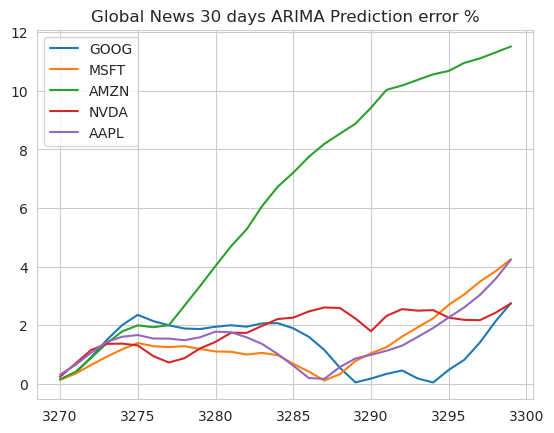

In [390]:
for i in range(len(df)):
    plt.plot(np.abs(df_ARIMA_diff_30[i]*100), label={stock_symbols[i]})
plt.title(f"Global News 30 days ARIMA Prediction error %" , fontsize = 12)
plt.legend()

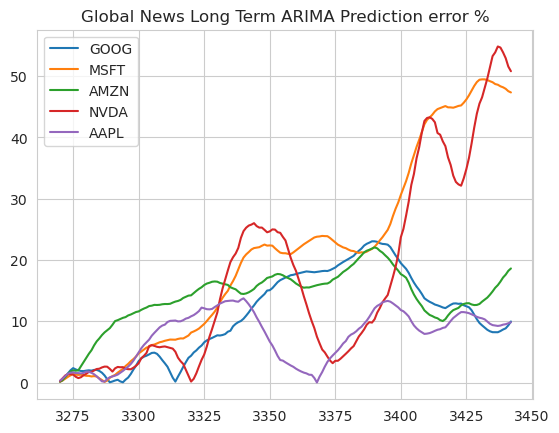

In [391]:
for i in range(len(df)):
    plt.plot(np.abs(df_ARIMA_diff[i]*100), label={stock_symbols[i]})
plt.title(f"Global News Long Term ARIMA Prediction error %" , fontsize = 12)
plt.legend()

In [376]:
df_ARIMA_diff[0]["Change"] = ((test[0][:step[0]].Close - fc[0][:step[0]]))/(test[0][:step[0]].Close)
#df_ARIMA_diff[0]["Change"] = (test[0].Close - arima_result_train[0].fittedvalues)
df_ARIMA_diff[0]['Label'] = (df_ARIMA_diff[0]["Change"] > 0).astype(int)
df_ARIMA_diff[0]['ARIMA_Pred'] = fc[0][:step[0]]

In [377]:
# Drop NaN values
classification_data = df_ARIMA_diff[0]
X = classification_data['ARIMA_Pred']  # Features
y = classification_data['Label']         # Target
print(len(X), len(y))

173 173


In [378]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


/home/hirak/anaconda3/envs/SIGNS_2024/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.90      1.00      0.95        28

    accuracy                           0.91        35
   macro avg       0.95      0.79      0.84        35
weighted avg       0.92      0.91      0.90        35



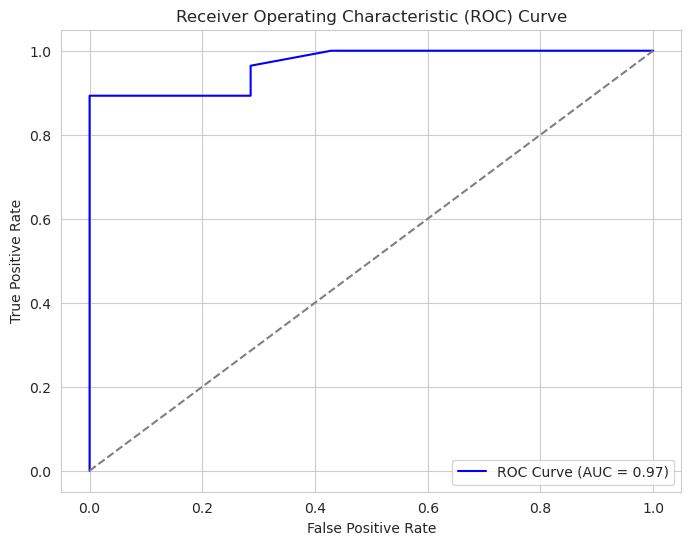

In [380]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


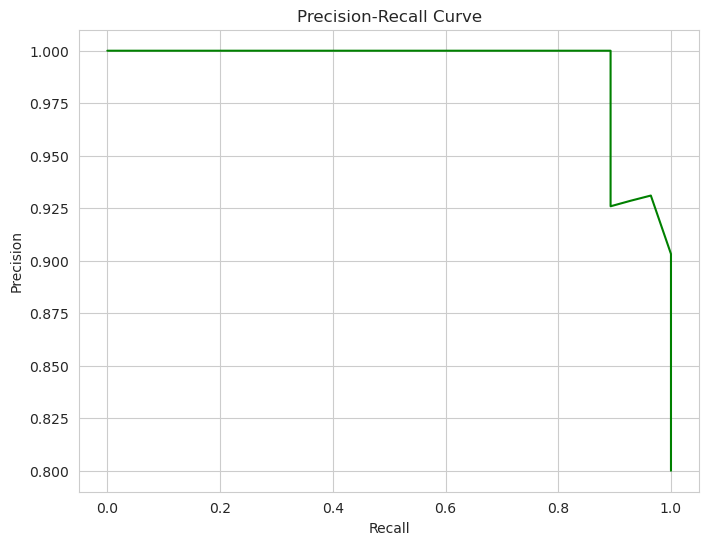

In [381]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
